In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from fdm.src.fdm3t import fdm3t
from fdm.src.mfgrid import Grid
from scipy.special import exp1
from analytic.hantush_convolution import Wh
import etc

Wh(0.001, 0.3)  = (2.7449201210813685, 4.580772753804319e-09)
Wh(0.01, 0.3)   = (2.7104287908047175, 1.8261895390546826e-09)
Wh(0.1, 0.3)    = (1.6703650224009043, 5.50906758939597e-09)


In [2]:
dtypeQ   = np.dtype([('I', np.int32), ('q', float)])
dtypeH   = np.dtype([('I', np.int32), ('h', float)])
dtypeGHB = np.dtype([('I', np.int32), ('h', float), ('C', float)])

In [3]:
def boulton(um1=None, r=None, D=None, kr=None, kz=None, ss=None, rhos=None, epsilon=0.67, **kw):

    kD = (kr[1:] * D[1:]).sum()
    S0  = ss[0] * D[0]
    S1 = (ss[1:] * D[1:]).sum()

    Q = 4 * np.pi * kD

    z = np.hstack((0, -D))

    gr = Grid(r, [-0.5, +0.5], z, axial=True)

    idomain = gr.const(1, dtype=int)

    ss = ss[:, np.newaxis, np.newaxis] * gr.const(1.)
    kr = kr[:, np.newaxis, np.newaxis] * gr.const(1.)
    kz = kz[:, np.newaxis, np.newaxis] * gr.const(1.)

    hi = gr.const(0.)

    fq = np.zeros(1, dtype=dtypeQ)
    fq['I'], fq['q'] = gr.NOD[-1, 0, 0], Q
    fq = {0: fq}

    xlim = np.logspace(-2, 7, 2)
    ylim = np.logspace(-4, 2, 2)

    ax = etc.newfig(kw['title'] + f", no fixed heads, grid shape = {gr.shape}, ",
            r'increasing r <--- $(4 kD /S) (t / r^2)$ ---> increasing t',
            r'$s  / (Q / (4 \pi kD))$',
            xscale='log', yscale='log', xlim=xlim, ylim=ylim)

    ax.plot(um1,          exp1(1/um1), 'r.-',  lw=2, label=f'Theis Sy = {S0:.4g}')
    ax.plot(um1 * S0 /S1, exp1(1/um1), 'r.--', lw=2, label=f'Theis S  = {S1:.4g}')

    ir = np.arange(gr.nx + 1)[r < 60][-1]

    clrs = etc.color_cycler()
    for rho in rhos:
        clr = next(clrs)
        t = r[ir] ** 2 * S1 / (4 * kD) * um1
        B = r[ir] / rho
        ctop = B ** 2  / kD

        c = gr.const(0.)[:-1]
        c[0] = ctop

        out = fdm3t(gr=gr, t=t, k=(kr, kr, kz), ss=ss, fh=None,
                    fq=fq, hi=hi, idomain=idomain, c=c, ghb=None, epsilon=epsilon)

        ax.plot(um1, out['Phi'][:, -1, 0, ir],  color=clr, label=f"Phi[:,-1,0,{ir}], rho={rho:.4g}")
        ax.plot(um1, Wh(1/um1, rho)[0], '--', color=clr, label=f"Wh(u, rho),     rho={rho:.4g}")

    ax.legend()
    return ax

In [4]:
boulton63_kwargs = {
        'title': 'Boulton 1963, delayed yield',
        'comment': """Boulton is simulated using 2 layers. One is the top layer with given Sy and
        given resistance between the first and second layer. The second layer is the aquifer with
        elastic storage coefficient S. The resisance between the two layers follows from the
        value of rho used. A single reference distance r_ is used for all curve. This has no effect
        on the results because these are given on dimensionless graphs.
        """,
        'um1': np.logspace(-5, 9, 141), # um1 = 1/ u
        'r': np.hstack((0., np.logspace(-2, 6, 8 * 80))),
        'D': np.array([10., 50.]),
        'kr': np.array([ 0., 10.]),
        'kz': np.array([ 1e6,  1e6]),
        'ss': np.array([  0.01, 0.2e-6]),
        'rhos': [0., 0.01, 0.03, .1, .3, 1., 3.], # c comes from rho
        'r_': 30,
        'epsilon': 0.5,
        }

/var/folders/90/m51x_b713y561gzh2kzy18d00000gq/T/ipykernel_41089/1554811471.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  B = r[ir] / rho


Running in axial mode, y-values are ignored.
Running in axial mode, y-values are ignored.
Running in axial mode, y-values are ignored.
Running in axial mode, y-values are ignored.
Running in axial mode, y-values are ignored.
Running in axial mode, y-values are ignored.
Running in axial mode, y-values are ignored.


<Axes: title={'center': 'Boulton 1963, delayed yield, no fixed heads, grid shape = (2, 1, 640), '}, xlabel='increasing r <--- $(4 kD /S) (t / r^2)$ ---> increasing t', ylabel='$s  / (Q / (4 \\pi kD))$'>

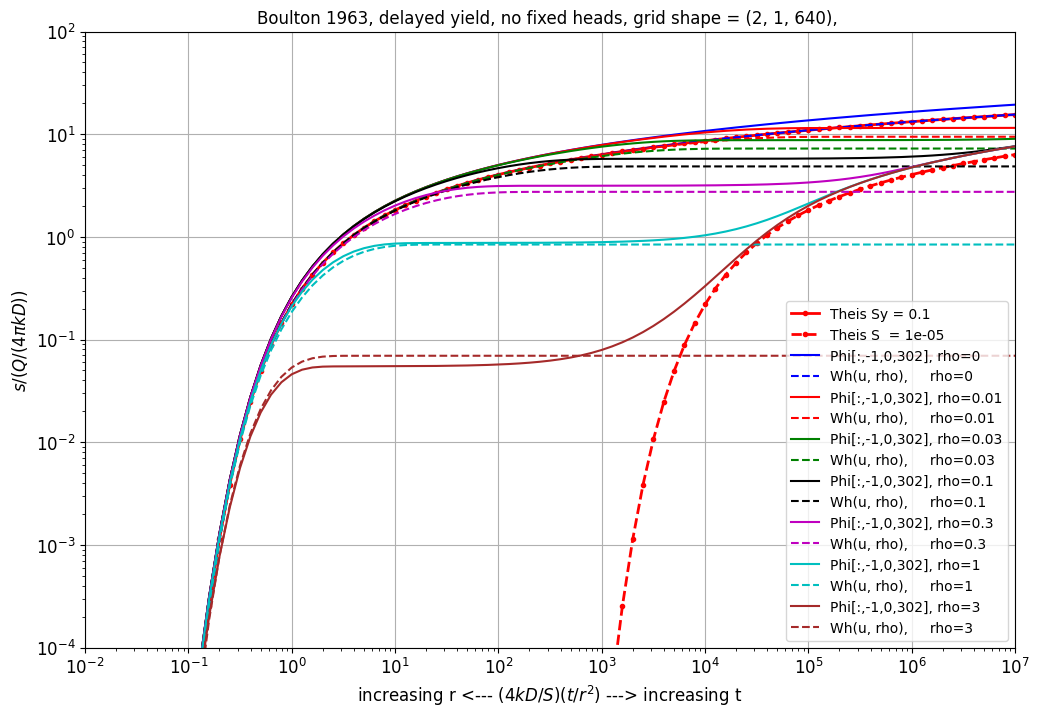

In [5]:
boulton(**boulton63_kwargs)